# Using Test Data 

In [1]:
%load_ext autoreload
%autoreload 2  
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)
import lime.explanation
import torch
import numpy as np
from Processing.Sample import Sample
import numpy as np
from torch.utils.data import DataLoader, TensorDataset 
import torch.nn as nn
import torch.optim as optimise
from torch.optim.lr_scheduler import StepLR
from Models.Core_CNN import Core_CNN
from Models.Core_CNN_TPL import Core_CNN_TPL
from Models.SCNN_TPL import SCNN_TPL
from Models.SCNN_TPL3 import SCNN_TPL3
from Processing.Trainer import Trainer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# data = Trainer.load_data(1, )

import tensorflow as tf
import torch
import pandas as pd
import numpy as np
import crime as cr
from crime.CRIME_functions import run_CRIME
import crime.lime_processing_functions as lpf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = torch.load('/local/scratch/code/TROPHY/CRIME_Package/CRIME/example data and models/data.pt')
labels = torch.load('/local/scratch/code/TROPHY/CRIME_Package/CRIME/example data and models/labels.pt')
x_axis_values = pd.read_csv('/local/scratch/code/TROPHY/CRIME_Package/CRIME/example data and models/xaxis.txt')


import lime


print(data.shape)
print(labels.shape)
print(x_axis_values.shape)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Define the prediction function for LIME
def model_predict(data):
    # Data needs to be scaled before prediction
    data_scaled = tf.scalar_mul(2, data)
    return model.predict(data)

# Initialize and run the explainer
explainer = lpf.spectra_explainer(data, len(x_axis_values))
categories = [data[labels == i].numpy() for i in range(4)]
lime_data, category_indicator, spectra_indicator, mean_spectra_list = lpf.calculate_lime(categories, explainer, x_axis_values, model_predict)




/local/scratch/code/TROPHY/colon_data_analysis/CRIME


/home/tjh200/miniconda3/envs/ml_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-07 09:24:38.123115: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-07 09:24:38.136230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746609878.151265 1160318 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746609878.155990 1160318 cuda_blas.cc:

torch.Size([218, 842])
torch.Size([218])
(936, 1)


I0000 00:00:1746609880.933211 1160318 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 41003 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:00:08.0, compute capability: 8.9


In [10]:

np.save('/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/test_lime_data.npy', lime_data)
np.save('/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/test_category_indicator.npy', category_indicator)
np.save('/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/test_spectra_indicator.npy', spectra_indicator)
np.save('/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/test_mean_spectra_list.npy', mean_spectra_list)
print(y_test.float())
print(model.predict(X_test))
print(torch.mean(y_test.long()- model.predict(X_test))**2)

tensor([3., 3., 1., 1., 0., 1., 0., 0., 0., 1., 3., 3., 3., 1., 1., 1., 2., 3.,
        0., 1., 2., 1., 2., 1., 0., 0., 1., 0., 1., 1., 0., 3., 1., 3., 3., 0.,
        1., 1., 1., 1., 1., 1., 3., 3.])
[ 3.1849613   2.9474869   1.3101215   1.1359043   0.19138527  1.0416107
  0.05675697 -0.40865707 -0.25468636  0.9107952   3.7839909   2.8984756
  3.316492    1.1735611   0.9191017   1.0696621   1.909914    3.012766
  0.00384521  1.8170891   1.577589    1.2997742   1.654953    1.3077145
 -0.28059196 -0.3814106   1.1522961  -0.32364464  1.9899845   1.1470928
  0.4320755   3.7073631   0.5799198   2.9033585   3.092764   -0.07289696
  1.502306    1.6457787   0.76374435 -0.74798775  0.88448906  0.9468689
  3.800188    3.0119    ]
tensor(0.0035, dtype=torch.float64)


/tmp/ipykernel_1160318/2124850871.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  print(torch.mean(y_test.long()- model.predict(X_test))**2)


/tmp/ipykernel_1160318/94661933.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(lime_weights, dtype=torch.float32))


[1.04250000e+02 1.41868874e-01 1.30000000e-01 1.35697705e-02]
Epoch [100/100], Loss: 496.0782


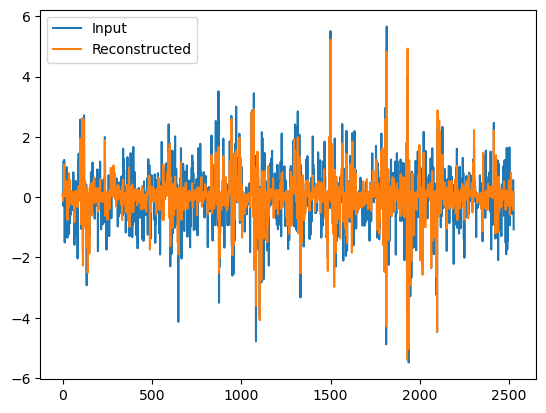

-0.6421938


/local/scratch/code/TROPHY/CRIME_Package/CRIME/crime/CRIME_functions.py:248: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latent_space_data = torch.tensor(lime_data)[:,:, 1:]
/local/scratch/code/TROPHY/CRIME_Package/CRIME/crime/CRIME_functions.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight_data = torch.tensor(lime_data)
/tmp/ipykernel_1160318/94661933.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


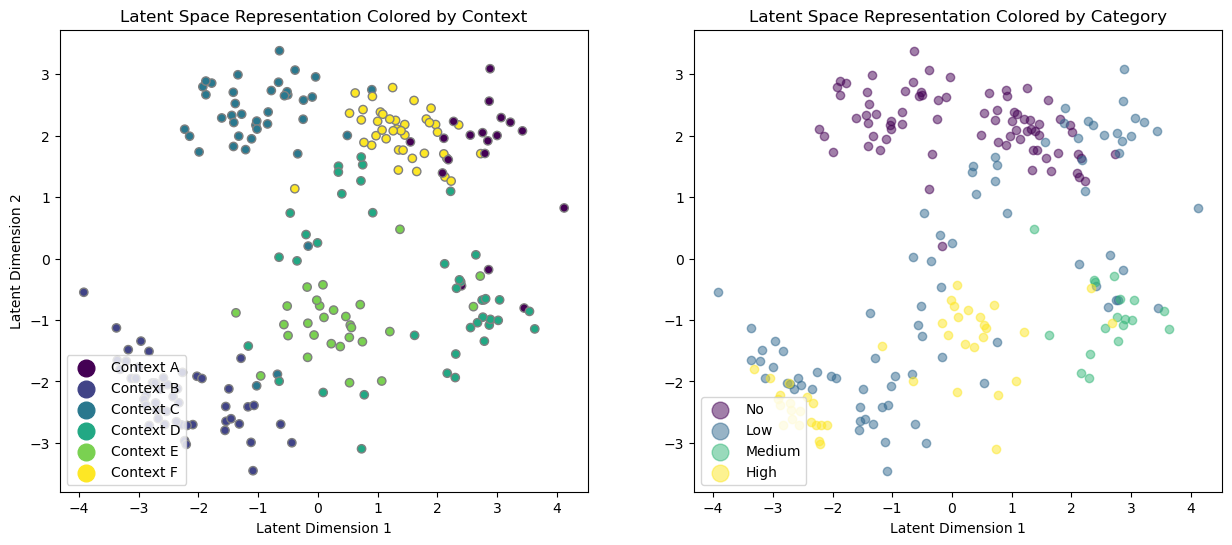

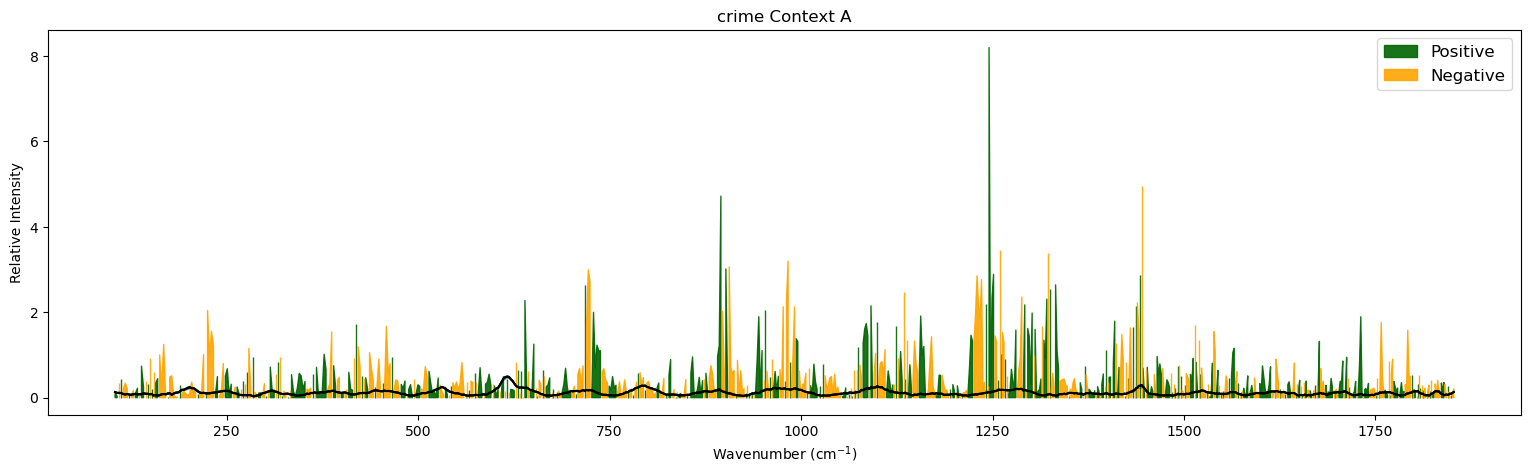

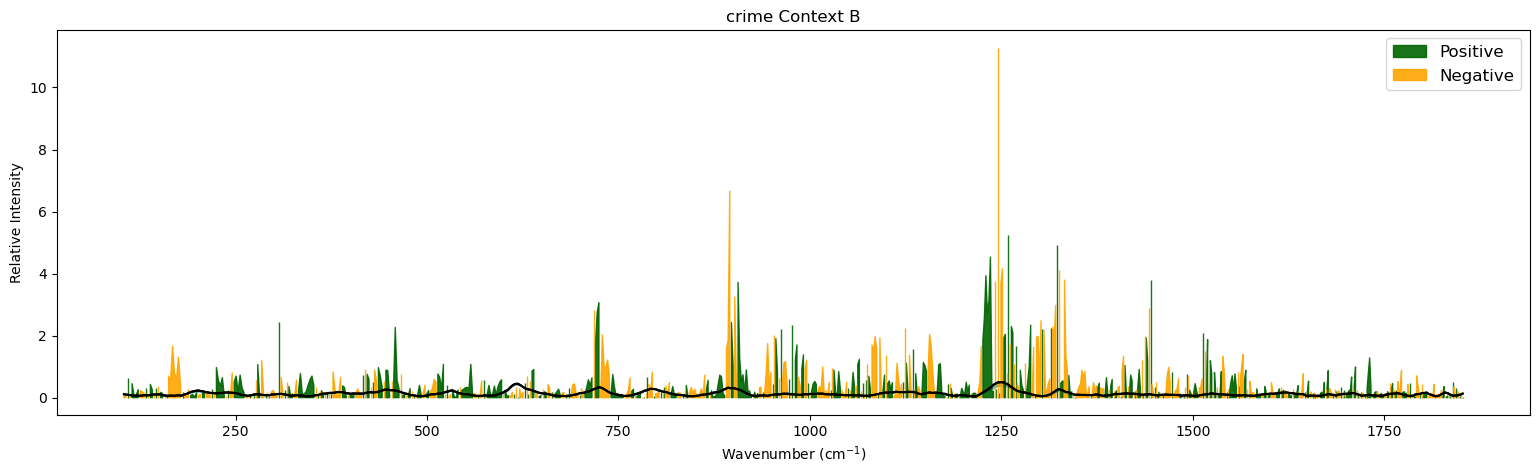

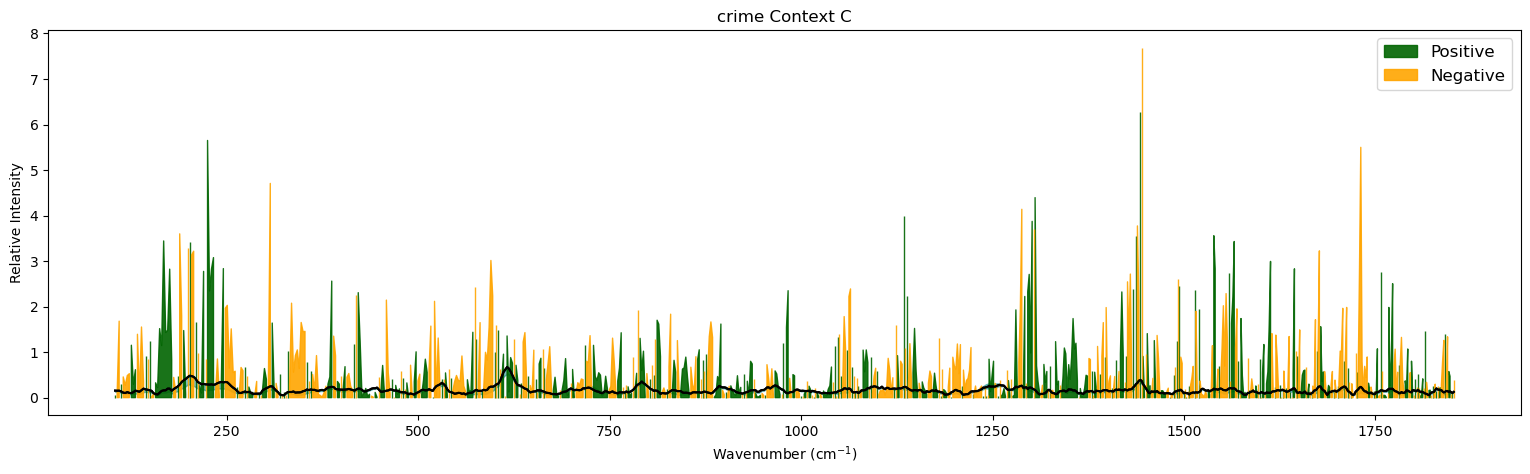

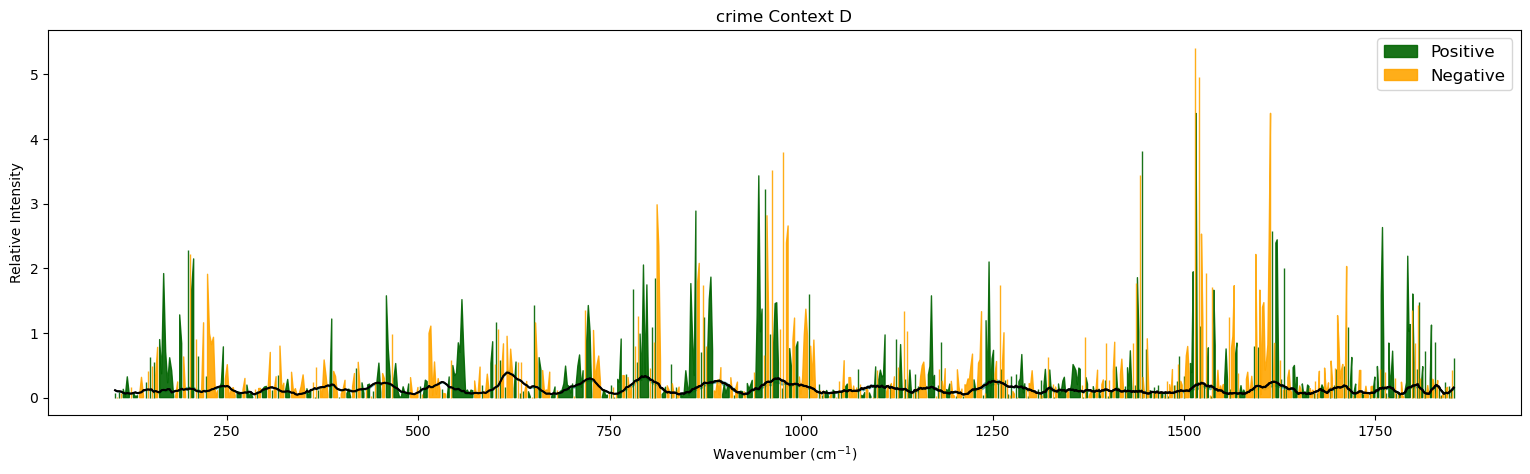

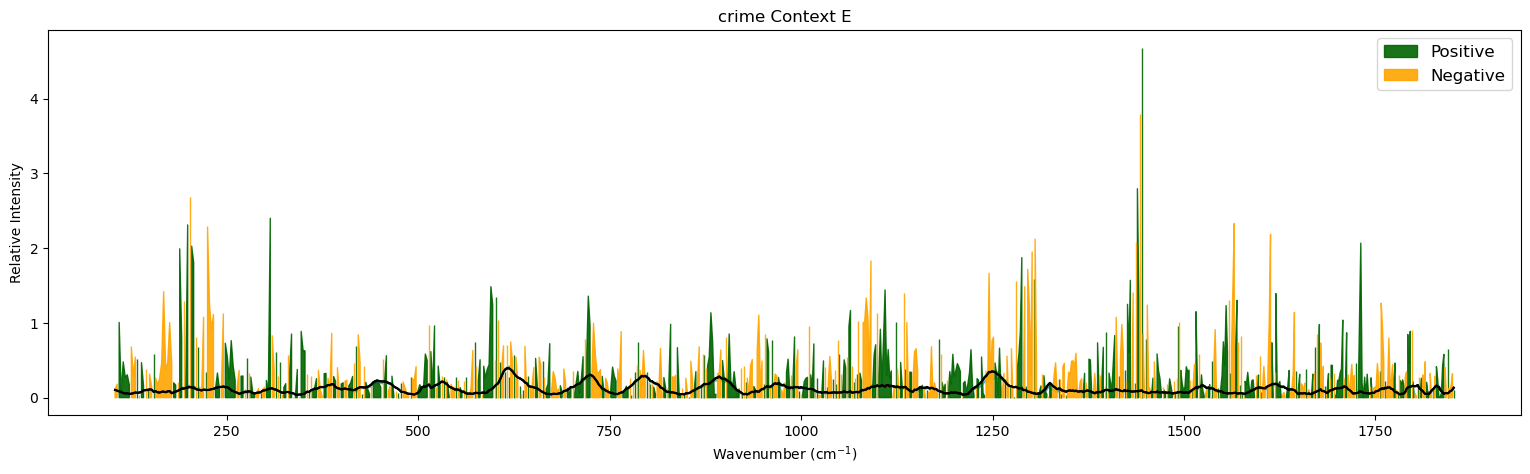

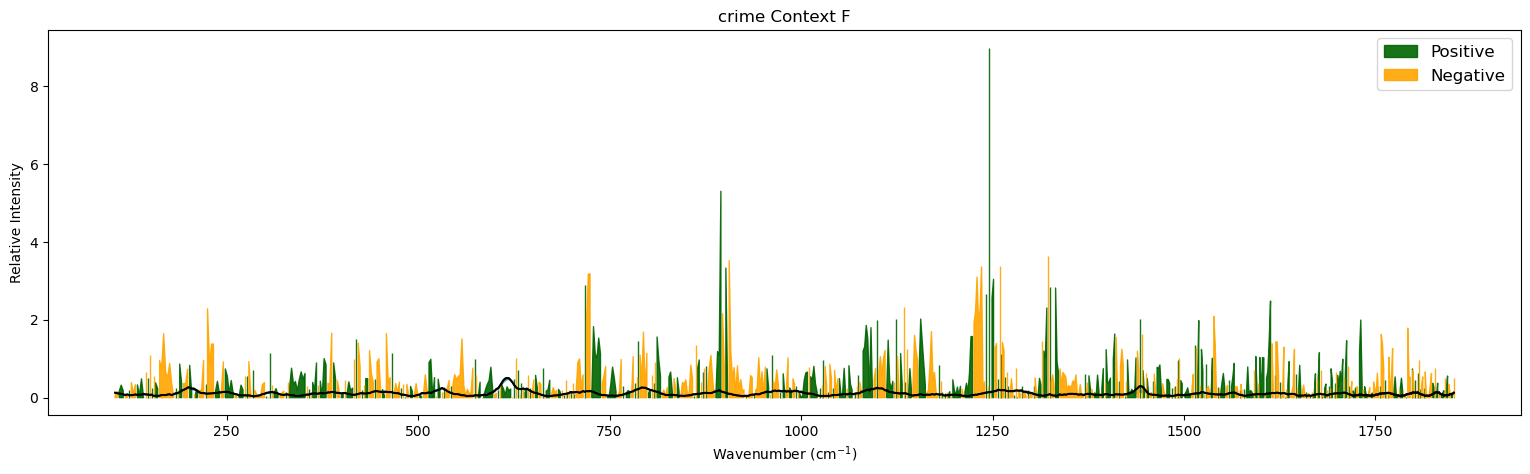

In [11]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU(inplace=True)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        hidden = self.relu(self.fc(x))
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar
    


class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, latent_dim):
        super().__init__()
        self.fc = nn.Linear(latent_dim, hidden_dim)
        self.relu = nn.ReLU(inplace=True)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        # self.sigmoid = nn.Sinh()
        # self.mult_param = nn.Parameter(torch.ones(1))

    def forward(self, x): 
        hidden = self.relu(self.fc(x))
        output = self.fc_out(hidden) #* self.mult_param
        return output

# Reparameterise to enable autodiff
def reparameterize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, output_dim):
        super().__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(output_dim, hidden_dim, latent_dim)
    
    def forward(self, x):
        mu, logvar = self.encoder(x)
        reparam = reparameterize(mu, logvar)
        reconstructed_x = self.decoder(reparam)
        return reconstructed_x, mu, logvar
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        x = self.encoder(x)
        return x

# Incorporate the Kullback-Leibler loss to prevent dvergence of probability distributions
def kl_mse_loss(recon_x, x, mu, logvar):
    mse = nn.functional.mse_loss(recon_x, x, reduction='sum') / x.size(0)
    # print(torch.max(recon_x))
    # print(torch.max(x))
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / x.size(0)
    return mse + kl, mse, kl
    

lime_data = np.load('/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/test_lime_data.npy')
category_indicator = np.load('/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/test_category_indicator.npy')
mean_spectra_list = np.load('/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/test_mean_spectra_list.npy')


encoder = VAE(input_dim = 3*842, hidden_dim=64, latent_dim=8, output_dim=3*842)
optimizer = torch.optim.Adam(encoder.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 100

# Create a DataLoader for the training data
# data = torch.load('/local/scratch/code/TROPHY/CRIME_Package/CRIME/example data and models/data.pt')
# data = torch.tensor(data, dtype=torch.float32)

lime_data_array = torch.tensor(lime_data)
lime_weights = lime_data_array[:, :, 1:]
train_dataset = TensorDataset(torch.tensor(lime_weights, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
print(np.array(lime_data[0][0]))
for epoch in range(num_epochs):
    for data in train_loader:
        inputs = data[0]
        optimizer.zero_grad()
        inputs = inputs.reshape(inputs.shape[0], -1)
        reconstructed_x, mu, logvar = encoder.forward(inputs)
        loss = kl_mse_loss(reconstructed_x, inputs, mu, logvar)
        # print(loss[0])
        loss[0].backward()
        optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss[0].item():.4f}')
        plt.plot(inputs[0].detach().numpy(), label='Input')
        plt.plot(reconstructed_x[0].detach().numpy(), label='Reconstructed')
        plt.legend()
        plt.show()

# lime_data_array  = lime_data_array.reshape(lime_data_array.shape[0], -1)
# Execute CRIME analysis
results = run_CRIME(lime_data=lime_data_array, encoder=encoder, cat_names=['No', 'Low', 'Medium', 'High'], context_names=list('ABCDEF'), mean_spectra_list = mean_spectra_list, category_indicator = category_indicator, plot_clusters=False)


# Now Using MINERVA Data

In [10]:
%load_ext autoreload
%autoreload 2  
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)
import lime.explanation
import torch
import numpy as np
from Processing.Sample import Sample
import numpy as np
from torch.utils.data import DataLoader, TensorDataset 
import torch.nn as nn
import torch.optim as optimise
from torch.optim.lr_scheduler import StepLR
from Models.Core_CNN import Core_CNN
from Models.Core_CNN_TPL import Core_CNN_TPL
from Models.SCNN_TPL import SCNN_TPL
from Models.SCNN_TPL3 import SCNN_TPL3
from Processing.Trainer import Trainer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import wandb

# data = Trainer.load_data(1, )

import tensorflow as tf
import torch
import pandas as pd
import numpy as np
import crime as cr
from crime.CRIME_functions import run_CRIME
import crime.lime_processing_functions as lpf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from Processing.model_handling import get_fold_numbers
from Processing.model_handling import get_models_from_sweep
from Models.CombinationModel import CombinationModel

# First we need to import the data

sweep_id = "wh844aab"
entity = "tjh200-university-of-cambridge"
project = "TROPHY"
threshold = 0.55
threshold_quantity = "val_overall_accuracy"
eval_on = "train"
num_classes = 4
num_to_use_per_class = 5
prop_to_load = 1
assume_model_classifications = False

api = wandb.Api()
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
sweep_config = sweep.config

dataset_config = sweep_config['parameters']['dataset_config']['value']
num_training_folds = sweep_config['parameters']['number_of_training_folds']['value']
num_val_test_folds = sweep_config['parameters']['validation_test_folds']['value']
prop_to_use = sweep_config['parameters']['prop_to_use']['value']
trained_batch_size = sweep_config['parameters']['batch_size']['value']
model_class = sweep_config['parameters']['model_class']['values'][0]

train_fold_number, val_fold_number = get_fold_numbers(dataset_config, num_val_test_folds)


trainer = Trainer()
train_data, train_classes, val_data, val_classes, test_data, test_classes, [train_coords, val_coords, test_coords], [train_sample_nums, val_sample_nums, test_sample_nums]  = trainer.load_data(prop_to_load, trained_batch_size, num_training_folds, num_val_test_folds, train_fold_number, val_fold_number, return_loaders=False, return_coords=True, randomise=False)
print(train_classes)
selected_models = get_models_from_sweep(sweep_id, threshold_quantity, threshold)
combination_model = CombinationModel(model_class, selected_models, num_classes, combination_mode="vote_probs")
if assume_model_classifications:
    train_classes = np.argmax(combination_model.predict(train_data), axis=1)
    val_classes = np.argmax(combination_model.predict(val_data), axis=1)
    test_classes = np.argmax(combination_model.predict(test_data), axis=1)

final_train_data = []
final_train_classes = []
final_val_data = []
final_val_classes = []
final_test_data = []
final_test_classes = []

for identity in range(num_classes):
    train_identity_indices = np.where(train_classes == identity)[0]
    val_identity_indices = np.where(val_classes == identity)[0]
    test_identity_indices = np.where(test_classes == identity)[0]
    if len(train_identity_indices) > num_to_use_per_class:
        train_identity_indices = np.random.choice(train_identity_indices, num_to_use_per_class, replace=False)
    if len(val_identity_indices) > num_to_use_per_class:
        val_identity_indices = np.random.choice(val_identity_indices, num_to_use_per_class, replace=False)
    if len(test_identity_indices) > num_to_use_per_class:
        test_identity_indices = np.random.choice(test_identity_indices, num_to_use_per_class, replace=False)
    identity_train_data = train_data[train_identity_indices][:num_to_use_per_class]
    identity_train_classes = train_classes[train_identity_indices][:num_to_use_per_class]
    identity_val_data = val_data[val_identity_indices][:num_to_use_per_class]
    identity_val_classes = val_classes[val_identity_indices][:num_to_use_per_class]
    identity_test_data = test_data[test_identity_indices][:num_to_use_per_class]
    identity_test_classes = test_classes[test_identity_indices][:num_to_use_per_class]
    final_train_data = np.concatenate((final_train_data, identity_train_data), axis=0) if len(final_train_data) > 0 else identity_train_data
    final_train_classes = np.concatenate((final_train_classes, identity_train_classes), axis=0) if len(final_train_classes) > 0 else identity_train_classes
    final_val_data = np.concatenate((final_val_data, identity_val_data), axis=0) if len(final_val_data) > 0 else identity_val_data
    final_val_classes = np.concatenate((final_val_classes, identity_val_classes), axis=0) if len(final_val_classes) > 0 else identity_val_classes
    final_test_data = np.concatenate((final_test_data, identity_test_data), axis=0) if len(final_test_data) > 0 else identity_test_data 
    final_test_classes = np.concatenate((final_test_classes, identity_test_classes), axis=0) if len(final_test_classes) > 0 else identity_test_classes

if eval_on == "train":
    run_data = final_train_data
    run_classes = final_train_classes
elif eval_on == "val":
    run_data = final_val_data
    run_classes = final_val_classes
elif eval_on == "test":
    run_data = final_test_data
    run_classes = final_test_classes








explainer = lpf.spectra_explainer(run_data, len(run_data[0]))
categories = [run_data[run_classes == i] for i in range(4)]
wavenumbers = np.load('/local/scratch/Data/TROPHY/numpy/wavenumbers.npy')

lime_data, category_indicator, spectra_indicator, mean_spectra_list = lpf.calculate_lime(categories, explainer, wavenumbers, combination_model.predict)

run_identifier = f"CRIME_{sweep_id}_{eval_on}_{num_to_use_per_class}_{threshold}_{assume_model_classifications}"
save_dir = f"/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/{run_identifier}/"
os.makedirs(save_dir, exist_ok=True)
np.save(os.path.join(save_dir, 'lime_data.npy'), lime_data)
np.save(os.path.join(save_dir, 'category_indicator.npy'), category_indicator)
np.save(os.path.join(save_dir, 'spectra_indicator.npy'), spectra_indicator)
np.save(os.path.join(save_dir, 'mean_spectra_list.npy'), mean_spectra_list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cuda
Loading data with 2 training folds and 2 testing folds
On csvm5
(1192554,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
Loaded 90 samples


KeyboardInterrupt: 

In [ ]:
# print(np.argmax(train_classes, axis=1))
test_array
print(train_classes)


51462


In [ ]:
lime_data = np.load(os.path.join(save_dir, 'lime_data.npy'))

[[ 1.00700000e+03  0.00000000e+00  0.00000000e+00  4.32916671e-03]
 [ 1.00800000e+03  0.00000000e+00  0.00000000e+00  1.75020971e-03]
 [ 1.00900000e+03  0.00000000e+00  0.00000000e+00 -4.13651783e-03]
 ...
 [ 1.79800000e+03  1.71429606e-03  0.00000000e+00  2.64117573e-03]
 [ 1.79900000e+03  1.83428568e-03  0.00000000e+00  6.68268224e-03]
 [ 1.80000000e+03  0.00000000e+00  0.00000000e+00 -5.20200385e-03]]


In [1]:
combination_model.predict(train_data)

NameError: name 'combination_model' is not defined

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(4000, 801, 4)
[[ 1.00000000e+03  0.00000000e+00  0.00000000e+00 -1.24515212e-03]
 [ 1.00100000e+03  1.48144457e-03  0.00000000e+00 -7.32083047e-03]
 [ 1.00200000e+03  1.59256312e-03  0.00000000e+00 -6.48331367e-04]
 ...
 [ 1.79800000e+03  0.00000000e+00  0.00000000e+00  1.46058864e-03]
 [ 1.79900000e+03  3.60527961e-03  0.00000000e+00 -6.06977618e-03]
 [ 1.80000000e+03  3.90062202e-03  0.00000000e+00 -2.36596891e-03]]


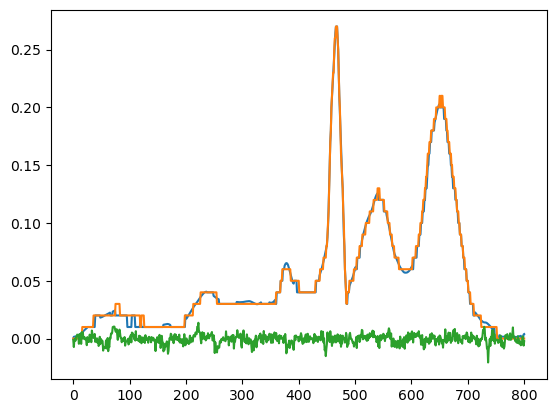

Trainable parameters: 1,695,524
1000
1000
[ 1.00000000e+03  1.94918667e-03  0.00000000e+00 -5.86032352e-03]


/tmp/ipykernel_336084/1432912825.py:264: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(lime_weights, dtype=torch.float32).to(device))


Epoch [20/80], Loss: 7.0878


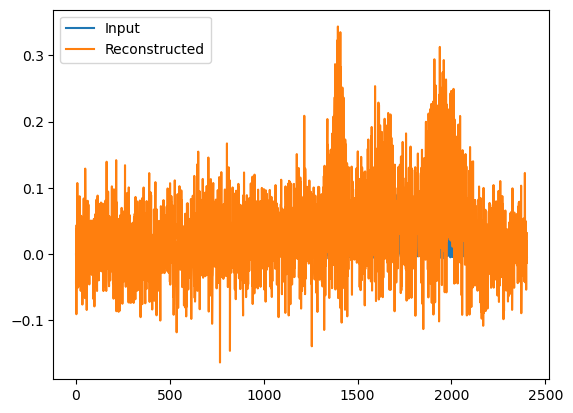

Epoch [40/80], Loss: 7.1747


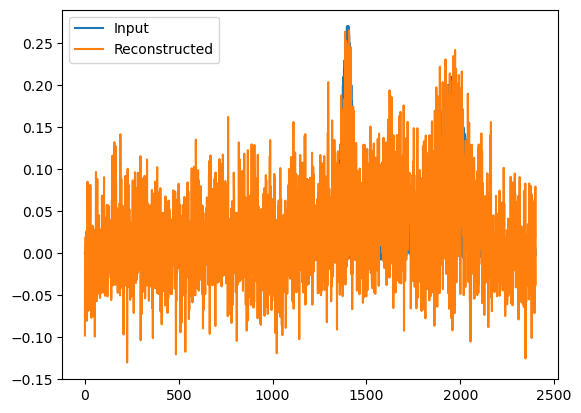

Epoch [60/80], Loss: 7.6526


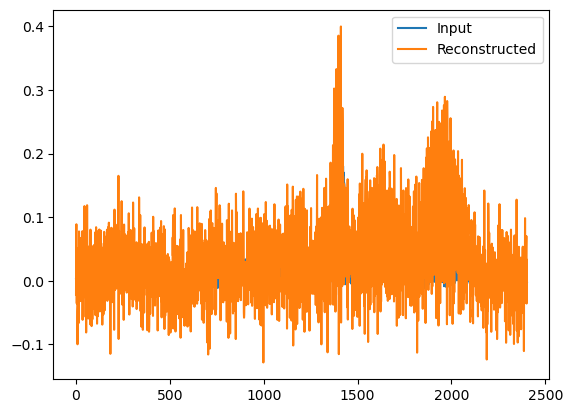

Epoch [80/80], Loss: 6.5646


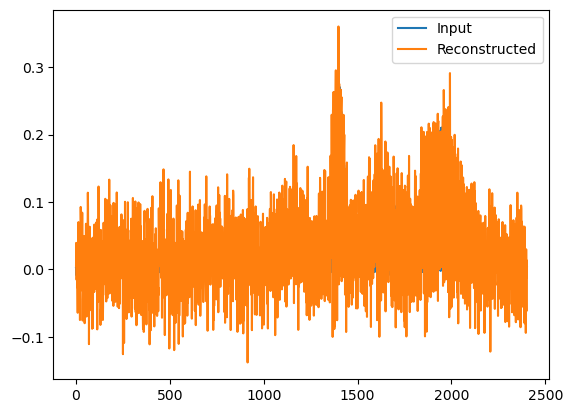

In [49]:
%load_ext autoreload
%autoreload 2  
%matplotlib inline
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)
import lime.explanation
import torch
import numpy as np
from Processing.Sample import Sample
import numpy as np
from torch.utils.data import DataLoader, TensorDataset 
import torch.nn as nn
import torch.optim as optimise
from torch.optim.lr_scheduler import StepLR
from Models.Core_CNN import Core_CNN
from Models.Core_CNN_TPL import Core_CNN_TPL
from Models.SCNN_TPL import SCNN_TPL
from Models.SCNN_TPL3 import SCNN_TPL3
from Processing.Trainer import Trainer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import wandb

# data = Trainer.load_data(1, )

import tensorflow as tf
import torch
import pandas as pd
import numpy as np
import crime as cr
from crime.CRIME_functions import run_CRIME
import crime.lime_processing_functions as lpf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from Processing.model_handling import get_fold_numbers
from Processing.model_handling import get_models_from_sweep
from Models.CombinationModel import CombinationModel
import random

seed = 42
os.environ["PYTHONHASHSEED"] = str(seed)          # hashes & dict iteration
random.seed(seed)                                 # `random` std‑lib
np.random.seed(seed)                              # NumPy
torch.manual_seed(seed)                           # PyTorch CPU
torch.cuda.manual_seed_all(seed)                  # all GPU devices
tf.random.set_seed(seed)                          # TensorFlow
# make CuDNN deterministic
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
# if you need absolute determinism even for some lower‑level ops:
# torch.use_deterministic_algorithms(True, warn_only=True)

class LinearEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()
        self.bn_input = nn.BatchNorm1d(input_dim)
        num_abstract_dims = 1
        self.input_conv_1 = nn.Conv1d(1, num_abstract_dims, kernel_size=3, stride=1, padding=0)
        self.input_conv_2 = nn.Conv1d(1, num_abstract_dims, kernel_size=10, stride=1, padding=0)
        self.input_conv_3 = nn.Conv1d(1, num_abstract_dims, kernel_size=25, stride=1, padding=0)
        self.input_conv_4 = nn.Conv1d(1, num_abstract_dims, kernel_size=50, stride=1, padding=0)
        self.input_conv_5 = nn.Conv1d(1, num_abstract_dims, kernel_size=100, stride=1, padding=0)
        self.input_conv_6 = nn.Conv1d(1, num_abstract_dims, kernel_size=200, stride=1, padding=0)
        self.input_conv_7 = nn.Conv1d(1, num_abstract_dims, kernel_size=400, stride=1, padding=0)
        flattened_length = input_dim + num_abstract_dims * ((input_dim - 2) + (input_dim - 9) + (input_dim - 24) + (input_dim - 49) + (input_dim - 99) + (input_dim - 199) + (input_dim - 399))

        self.fc = nn.Linear(flattened_length, hidden_dim)
        self.relu = nn.ReLU(inplace=True)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.bn_fc = nn.BatchNorm1d(hidden_dim)

    def forward(self, x):
        x = self.bn_input(x)
        # print(x.shape)
        x = x.unsqueeze(1)
        # print(x.shape)
        x1 = self.input_conv_1(x)
        x2 = self.input_conv_2(x)
        x3 = self.input_conv_3(x)
        x4 = self.input_conv_4(x)
        x5 = self.input_conv_5(x)
        x6 = self.input_conv_6(x)
        x7 = self.input_conv_7(x)
        x1 = x1.view(x1.size(0), -1)
        x2 = x2.view(x2.size(0), -1)
        x3 = x3.view(x3.size(0), -1)
        x4 = x4.view(x4.size(0), -1)
        x5 = x5.view(x5.size(0), -1)
        x6 = x6.view(x6.size(0), -1)
        x7 = x7.view(x7.size(0), -1)

        x_convs = torch.concat([x1, x2, x3, x4, x5, x6, x7], dim=1)
        # print(x_convs.shape)
        # print(x.shape)
        x = torch.concat([x.squeeze(1), x_convs], dim=1)
        # print(x.shape)


        hidden = self.fc(x)
        hidden = self.bn_fc(hidden)
        hidden = self.relu(hidden)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar
    


class LinearDecoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, latent_dim):
        super().__init__()
        self.fc = nn.Linear(latent_dim, hidden_dim)
        self.bn_fc = nn.BatchNorm1d(hidden_dim)
        self.relu = nn.ReLU(inplace=True)

        self.fc_out = nn.Linear(hidden_dim, output_dim)
        # self.sigmoid = nn.Sinh()
        # self.mult_param = nn.Parameter(torch.ones(1))

    def forward(self, x): 
        hidden = self.fc(x)
        hidden = self.bn_fc(hidden)
        hidden = self.relu(hidden)
        output = self.fc_out(hidden) #* self.mult_param
        return output

# Reparameterise to enable autodiff
def reparameterize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    # eps = torch.ones_like(std)
    return mu + eps * std

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, output_dim):
        super().__init__()
        self.encoder = LinearEncoder(input_dim, hidden_dim, latent_dim)
        self.decoder = LinearDecoder(output_dim, hidden_dim, latent_dim)
    
    def forward(self, x):
        mu, logvar = self.encoder(x)
        reparam = reparameterize(mu, logvar)
        reconstructed_x = self.decoder(reparam)
        return reconstructed_x, mu, logvar
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        x = self.encoder(x)
        return x

# Incorporate the Kullback-Leibler loss to prevent dvergence of probability distributions
def kl_mse_loss(recon_x, x, mu, logvar):
    mse = nn.functional.mse_loss(recon_x, x, reduction='sum') / x.size(0)
    # print(torch.max(recon_x))
    # print(torch.max(x))
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / x.size(0) * beta
    return mse + kl, mse, kl

sweep_id = "wh844aab"
entity = "tjh200-university-of-cambridge"
project = "TROPHY"

api = wandb.Api()
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
sweep_config = sweep.config

dataset_config = sweep_config['parameters']['dataset_config']['value']
num_training_folds = sweep_config['parameters']['number_of_training_folds']['value']
num_val_test_folds = sweep_config['parameters']['validation_test_folds']['value']
prop_to_use = sweep_config['parameters']['prop_to_use']['value']
trained_batch_size = sweep_config['parameters']['batch_size']['value']
model_class = sweep_config['parameters']['model_class']['values'][0]

use_lime_weights_only = False

threshold = 0.55
eval_on = "train"
num_to_use_per_class = 1000
assume_model_classifications = False
class_to_investigate = "cancer"

hidden_dim = 80
latent_dim = 80
if use_lime_weights_only:
    input_dim = 1*801
    output_dim = 1*801
else:
    input_dim = 3*801
    output_dim = 3*801
learning_rate = 0.02
num_epochs = 80
beta = 1

if class_to_investigate == "normal":
    class_to_investigate_index = 0
    classes_to_investigate = ["Normal"]
elif class_to_investigate == "adenoma":
    class_to_investigate_index = 1
    classes_to_investigate = ["Adenoma"]
elif class_to_investigate == "hyperplastic":
    class_to_investigate_index = 2
    classes_to_investigate = ["Hyperplastic"]
elif class_to_investigate == "cancer":
    class_to_investigate_index = 3
    classes_to_investigate = ["Cancer"]
elif class_to_investigate == "all":
    classes_to_investigate = ["Normal", "Adenoma", "Hyperplastic", "Cancer"]

    

run_identifier = f"CRIME_{sweep_id}_{eval_on}_{num_to_use_per_class}_{threshold}_{assume_model_classifications}"
save_dir = f"/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Results/{run_identifier}/"

lime_data = np.load(f"{save_dir}lime_data.npy")
category_indicator = np.load(f"{save_dir}/category_indicator.npy")
mean_spectra_list = np.load(f"{save_dir}/mean_spectra_list.npy")
print(np.shape(lime_data))  
print(lime_data[0])
plt.figure()
if use_lime_weights_only:
    plt.plot(lime_data[0,:, 3:])
else:
    plt.plot(lime_data[0,:, 1:])
plt.show()


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


encoder = VAE(input_dim = input_dim, hidden_dim=hidden_dim, latent_dim=latent_dim, output_dim=output_dim).to(device)
optimizer = torch.optim.Adam(encoder.parameters(), lr=learning_rate)#, weight_decay=1E-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15,gamma=0.5)



# Create a DataLoader for the training data
# data = torch.load('/local/scratch/code/TROPHY/CRIME_Package/CRIME/example data and models/data.pt')
# data = torch.tensor(data, dtype=torch.float32)

# Count only params that require gradients
num_params = sum(p.numel() for p in encoder.parameters() if p.requires_grad)
print(f"Trainable parameters: {num_params:,}")

if class_to_investigate == "all":
    lime_data = np.array(lime_data)
    mean_spectra_list = np.array(mean_spectra_list)
    category_indicator = np.array(category_indicator)
    
else:
    lime_data = np.array(lime_data)[category_indicator == class_to_investigate_index]
    mean_spectra_list = np.array(mean_spectra_list)[category_indicator == class_to_investigate_index]
    category_indicator = np.array(category_indicator)[category_indicator == class_to_investigate_index]
    
print(len(lime_data))
print(len(category_indicator))

lime_data_array = torch.tensor(lime_data).to(device)
if use_lime_weights_only:
    lime_weights = lime_data_array[:, :, 3:]
else:
    lime_weights = lime_data_array[:, :, 1:]
train_dataset = TensorDataset(torch.tensor(lime_weights, dtype=torch.float32).to(device))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
print(np.array(lime_data[0][0]))
for epoch in range(num_epochs):
    for data in train_loader:
        inputs = data[0]
        optimizer.zero_grad()
        inputs = inputs.reshape(inputs.shape[0], -1)
        reconstructed_x, mu, logvar = encoder.forward(inputs)
        loss = kl_mse_loss(reconstructed_x, inputs, mu, logvar)
        # print(loss[0])
        loss[0].backward()
        optimizer.step()
        scheduler.step()
    # if (epoch+1) % 2 == 0:
    #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss[0].item():.4f}')
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss[0].item():.4f}')
        # print(np.shape(inputs[0]))
        # print(inputs[0])
        plt.figure()
        plt.plot(inputs[0].cpu().detach().numpy(), label='Input')
        plt.plot(reconstructed_x[0].cpu().detach().numpy(), label='Reconstructed')
        plt.legend()
        plt.show()


# lime_data_array  = lime_data_array.reshape(lime_data_array.shape[0], -1)
# Execute CRIME analysis
# results = run_CRIME(lime_data=lime_data_array, encoder=encoder, cat_names=['Normal', 'Adenoma', 'Hyperplastic', 'Cancer'], context_names=list('ABCD'), mean_spectra_list = mean_spectra_list, category_indicator = category_indicator, plot_clusters=False)



(1000, 801)
-0.11275351


/local/scratch/code/TROPHY/CRIME_Package/CRIME/crime/CRIME_functions.py:251: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latent_space_data = torch.tensor(lime_data)[:, :, 1:]
/local/scratch/code/TROPHY/CRIME_Package/CRIME/crime/CRIME_functions.py:253: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight_data = torch.tensor(lime_data)
/tmp/ipykernel_336084/1432912825.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


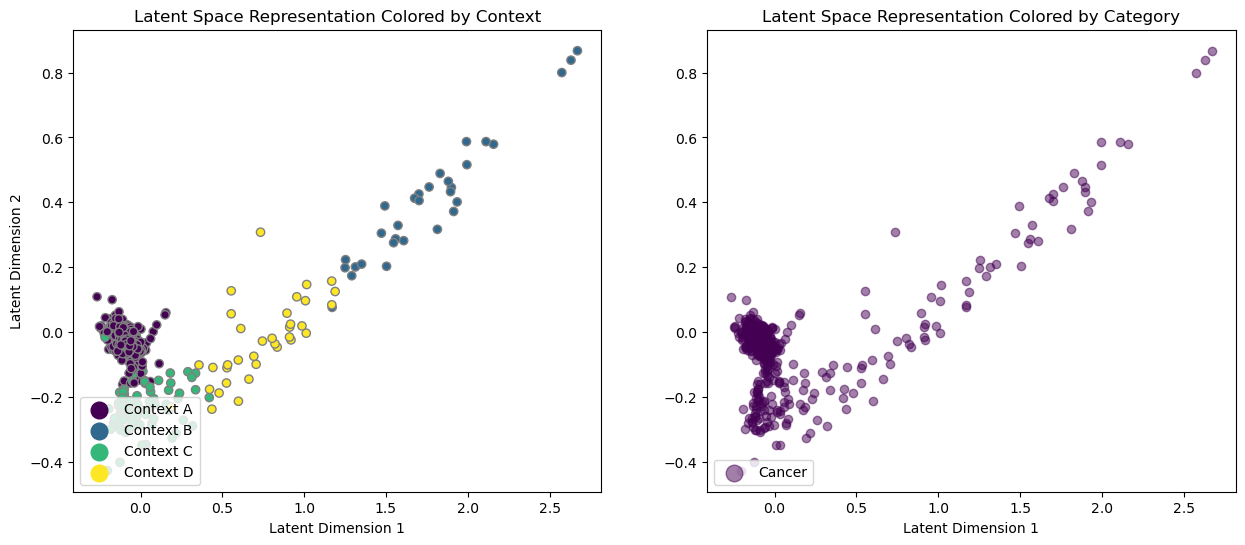

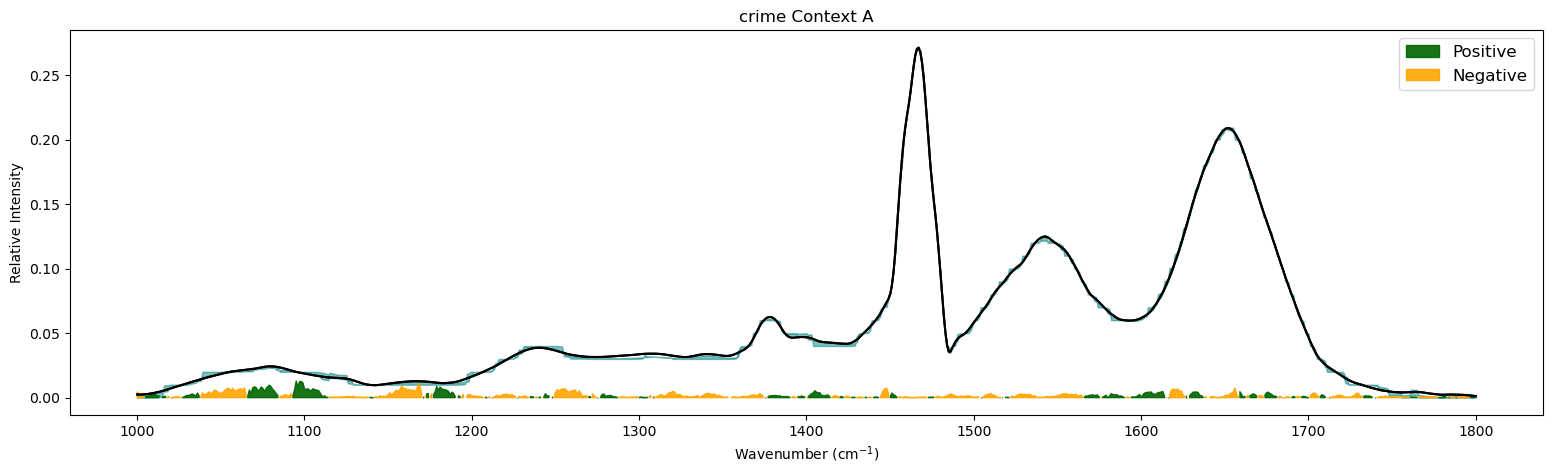

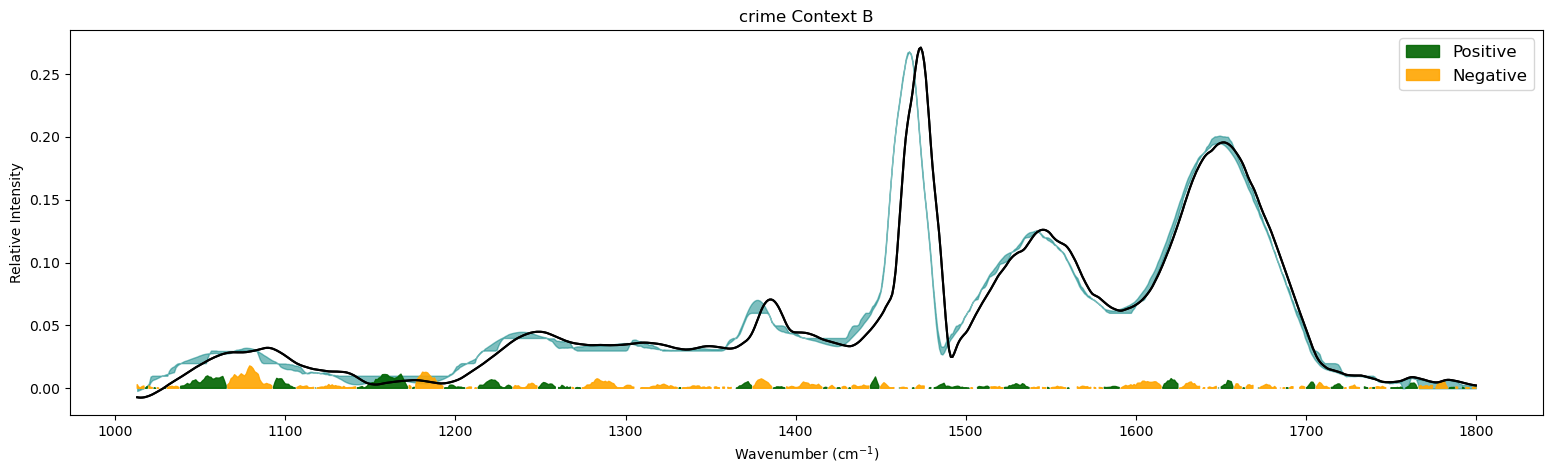

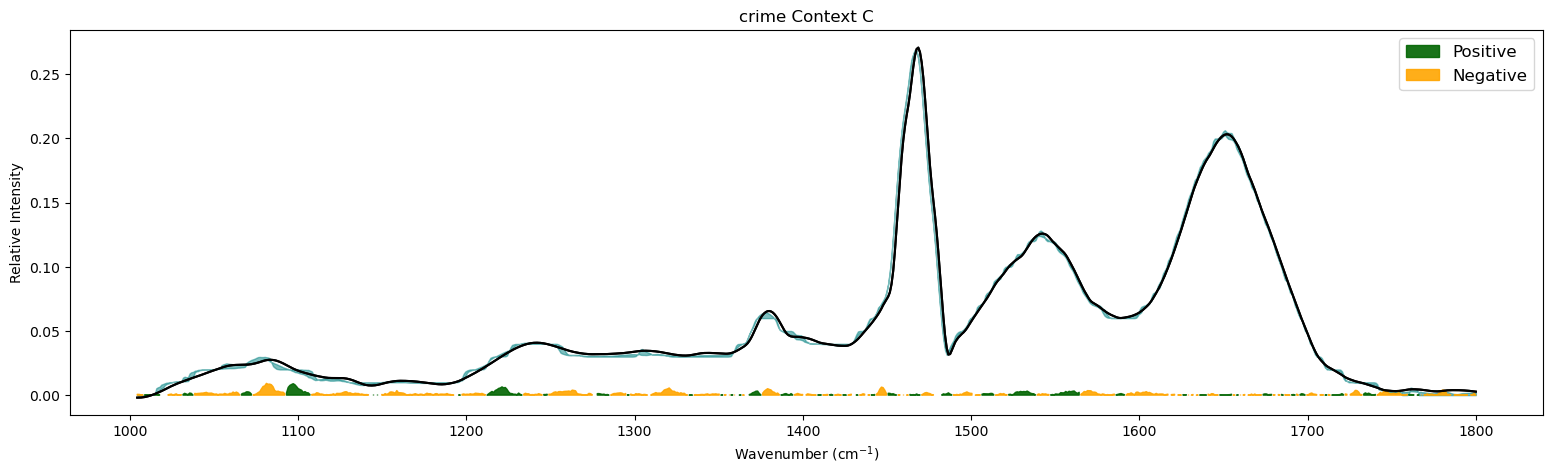

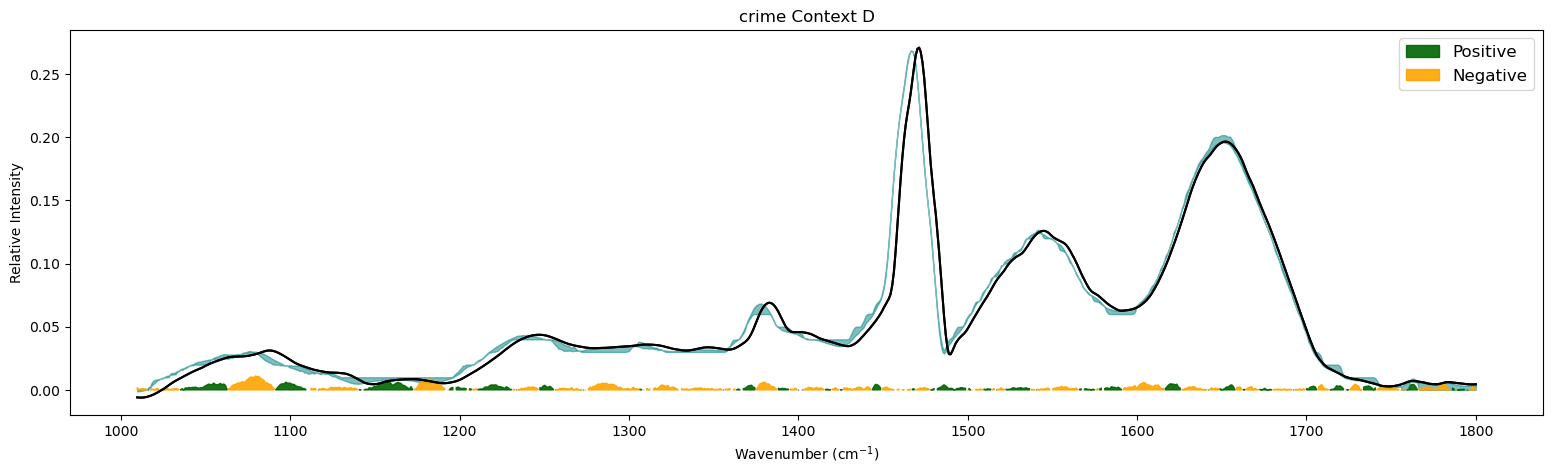

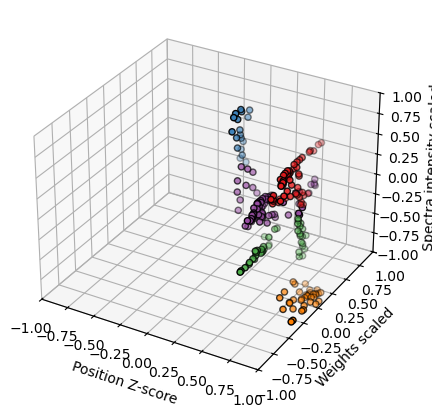

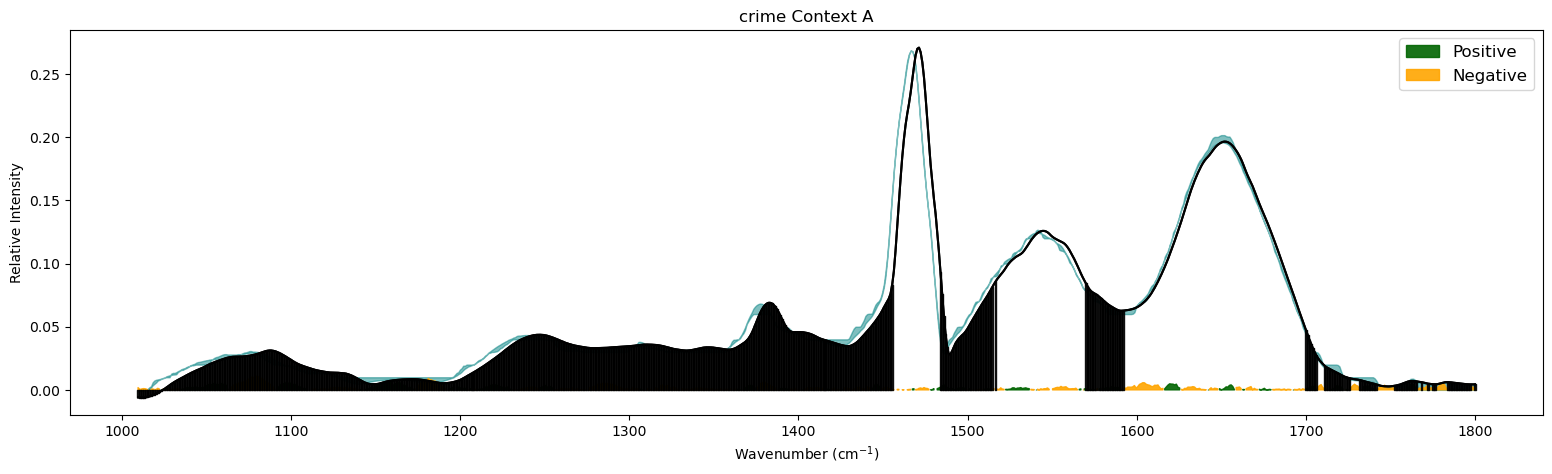

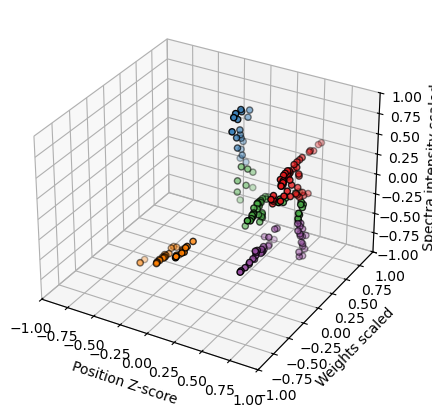

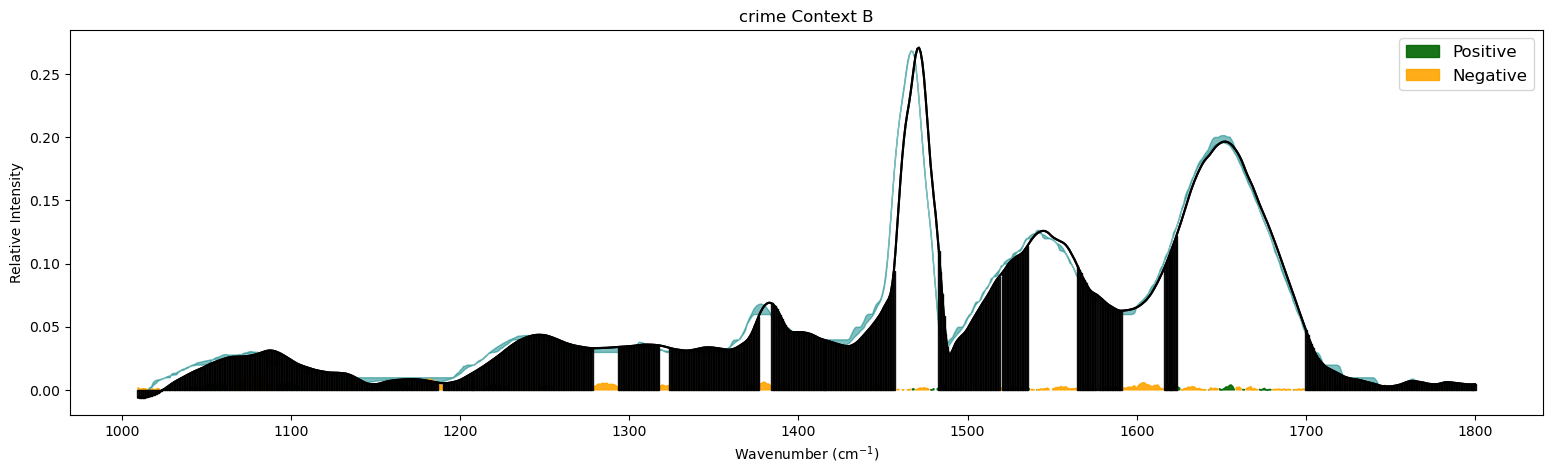

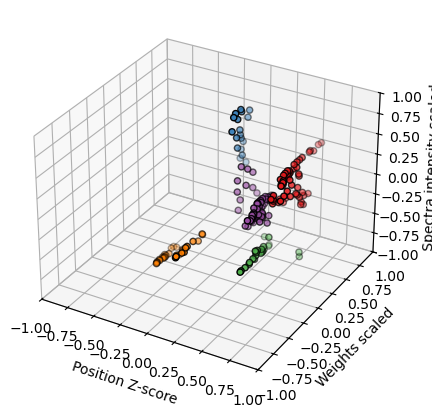

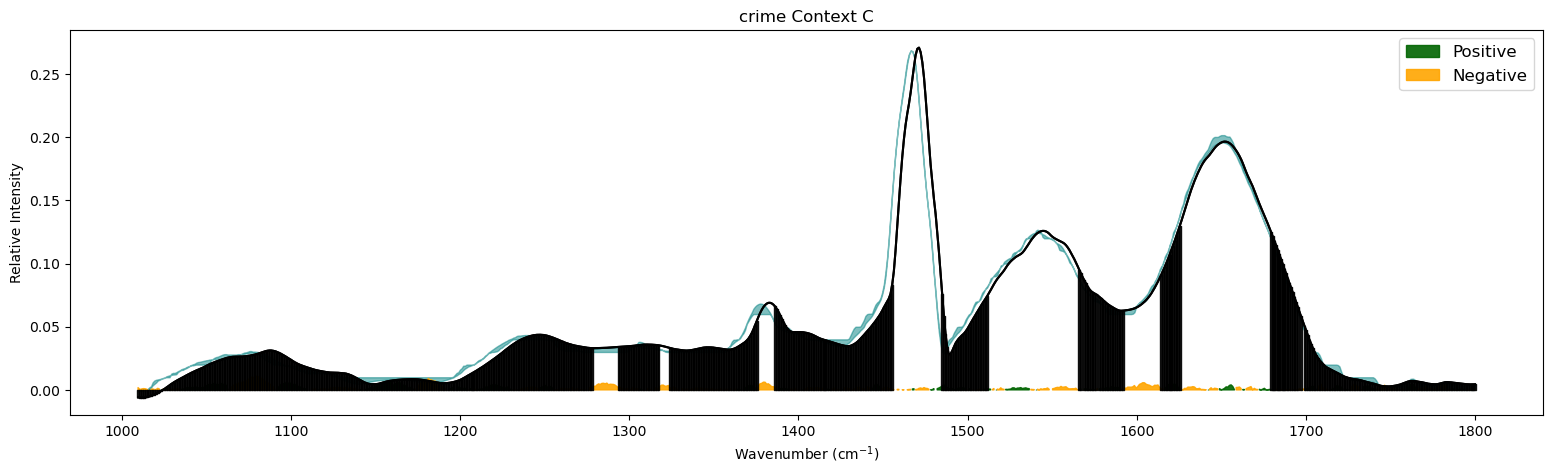

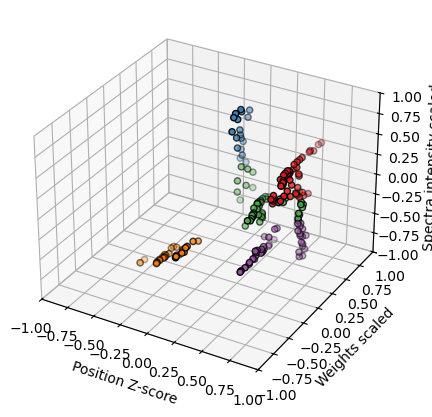

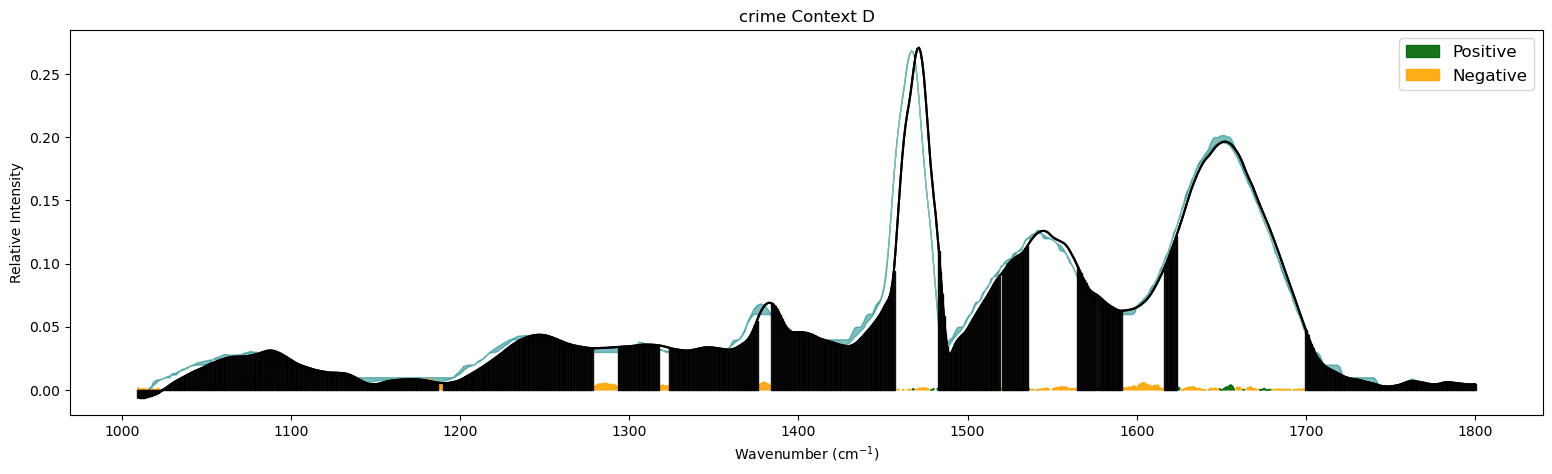

In [50]:
context_names = list('ABCD')
print(np.shape(mean_spectra_list))
results = run_CRIME(lime_data=lime_data_array.cpu(), encoder=encoder.cpu(), cat_names=classes_to_investigate, context_names=context_names, mean_spectra_list = mean_spectra_list, category_indicator = category_indicator, plot_clusters=True, lime_weights_only=use_lime_weights_only)


/tmp/ipykernel_336084/1432912825.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


-0.16850208


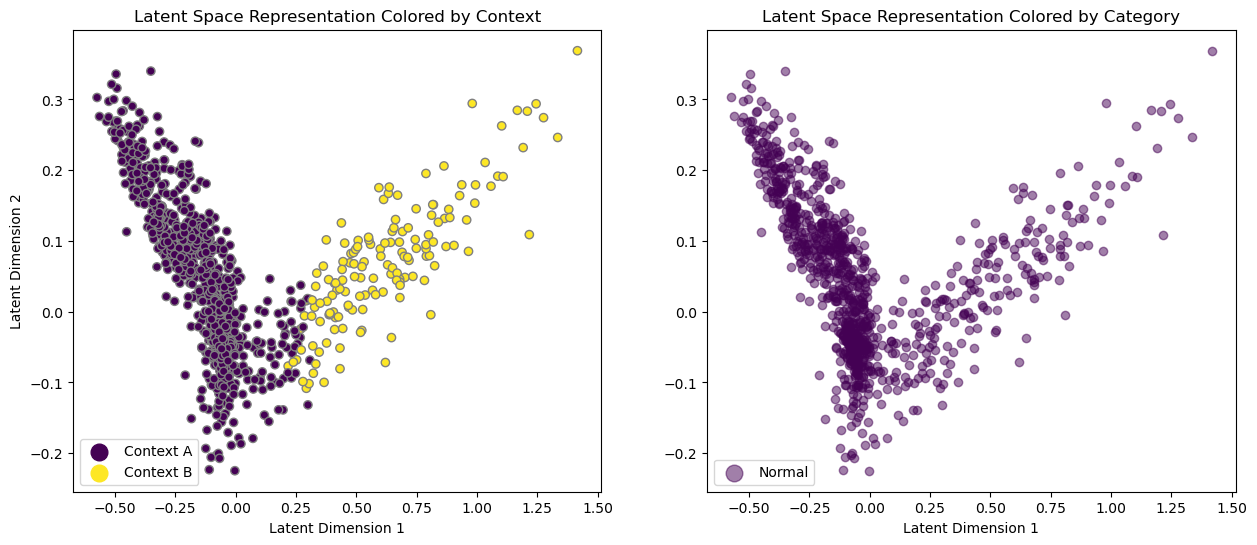

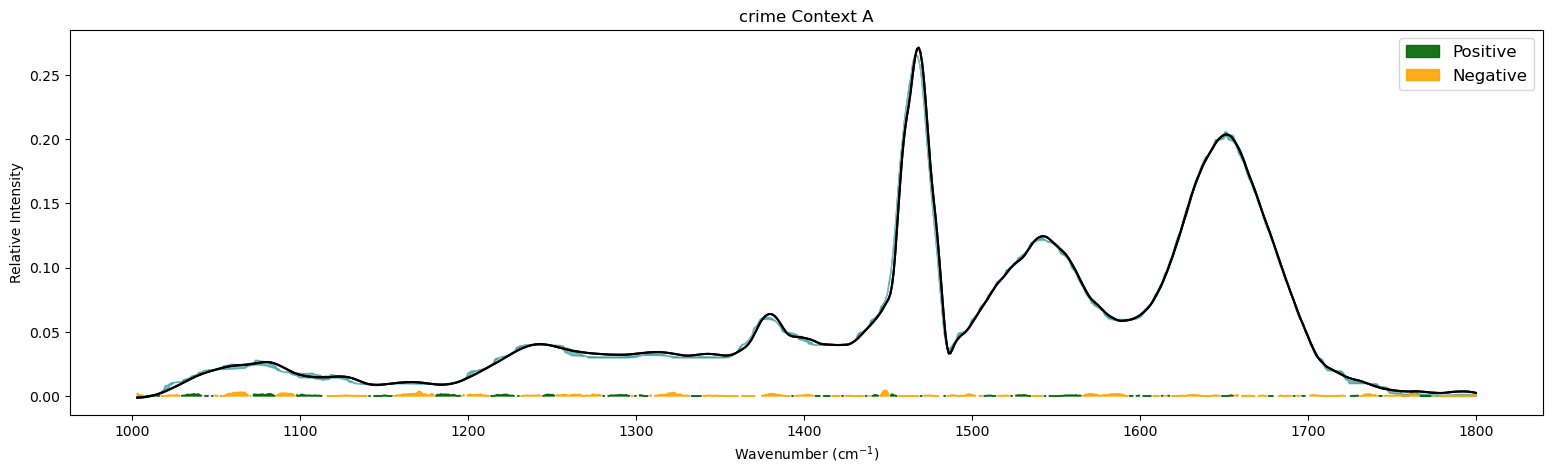

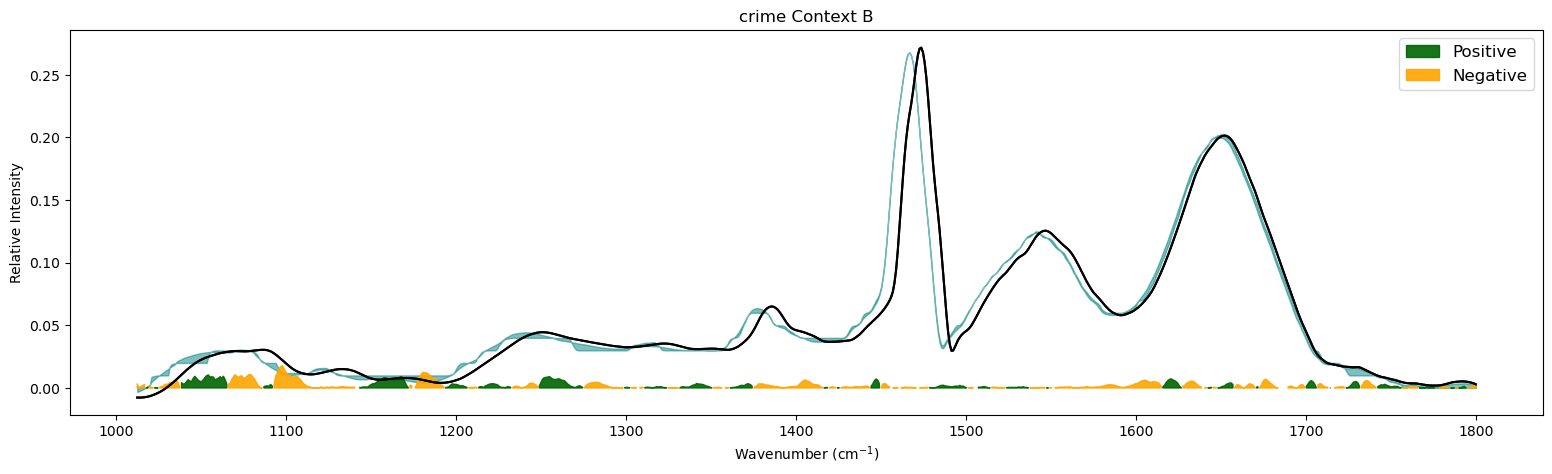

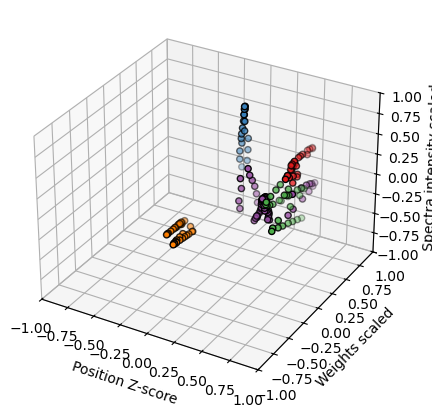

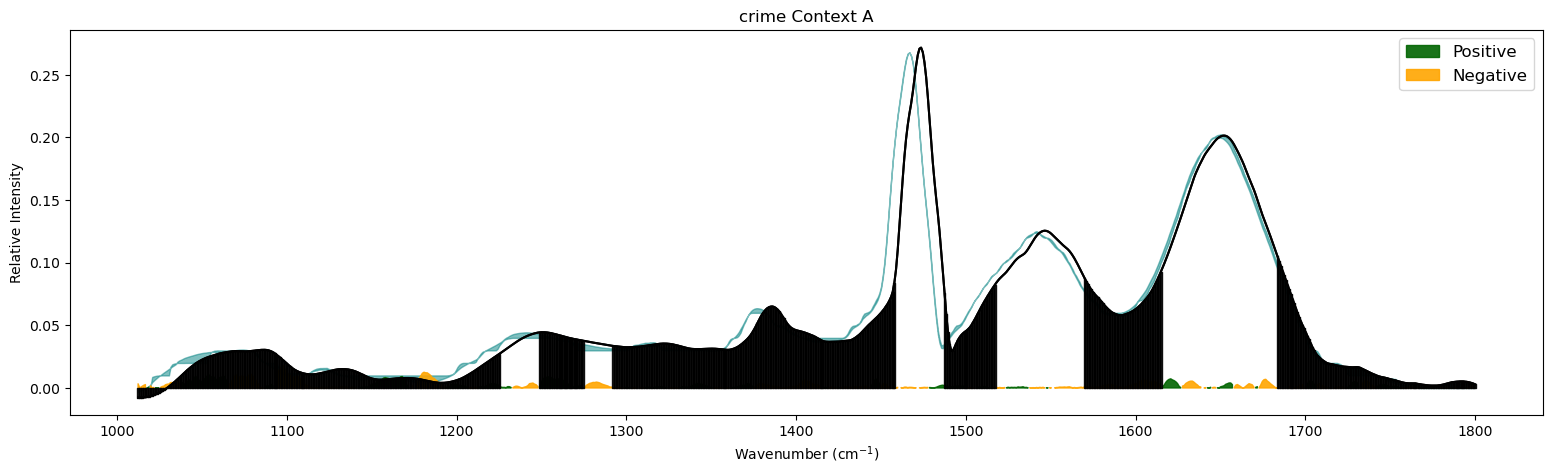

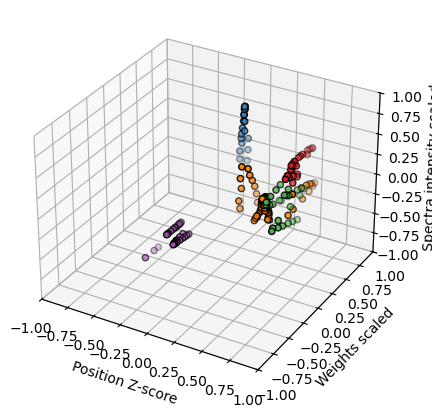

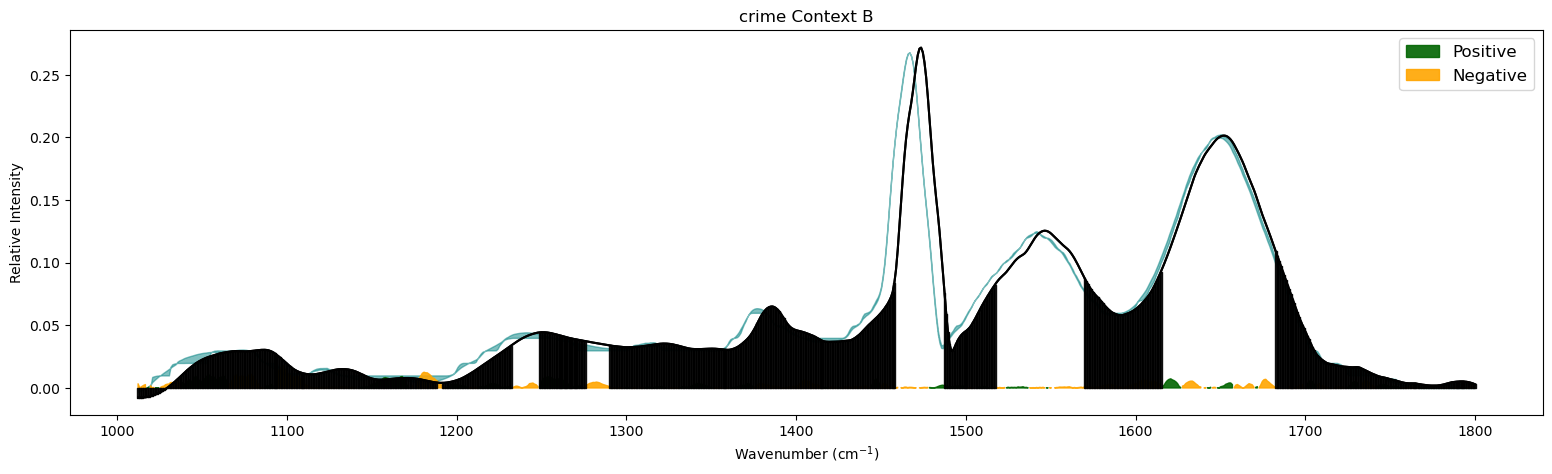

In [46]:
lime_data = np.load(f"{save_dir}lime_data.npy")
category_indicator = np.load(f"{save_dir}/category_indicator.npy")
mean_spectra_list = np.load(f"{save_dir}/mean_spectra_list.npy")
second_class_to_investigate_index = 0
second_classes_to_investigate = ["Normal"]
second_lime_data = np.array(lime_data)[category_indicator == second_class_to_investigate_index]
second_mean_spectra_list = np.array(mean_spectra_list)[category_indicator == second_class_to_investigate_index]
second_category_indicator = np.array(category_indicator)[category_indicator == second_class_to_investigate_index]

second_context_names = list('AB')
results = run_CRIME(lime_data=second_lime_data, encoder=encoder.cpu(), cat_names=second_classes_to_investigate, context_names=second_context_names, mean_spectra_list = second_mean_spectra_list, category_indicator = second_category_indicator, plot_clusters=True, lime_weights_only=use_lime_weights_only)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 3 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 3 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 2 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3
 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 2 0 0 0 1 0 3 2 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 2 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 2 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0
 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 2 0 3 0 0 2 0 2 0 0 2 1 0 0 0 0 0 0 0 0 3 0 2 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 3 0 0 0 0 2 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 1 0 0 0 0 0 0 

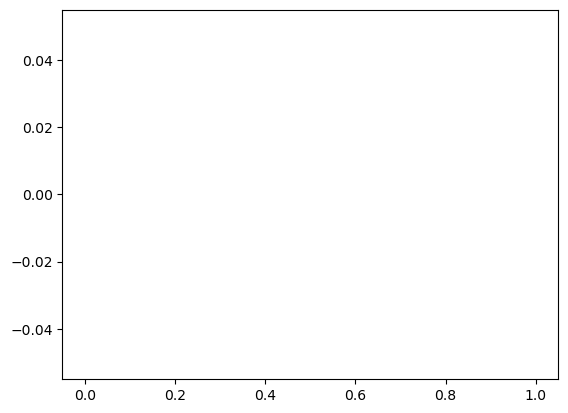

True class: Adenoma
(array([0, 0, 0, 0]), array([0.  , 0.25, 0.5 , 0.75, 1.  ]))


/tmp/ipykernel_336084/1885318368.py:29: RuntimeWarning: invalid value encountered in scalar divide
  cos_similarity = np.dot(corresponding_crime_labels, category_indicator[separated_category_indices[true_index]]) / (np.linalg.norm(corresponding_crime_labels) * np.linalg.norm(category_indicator[separated_category_indices[true_index]]))


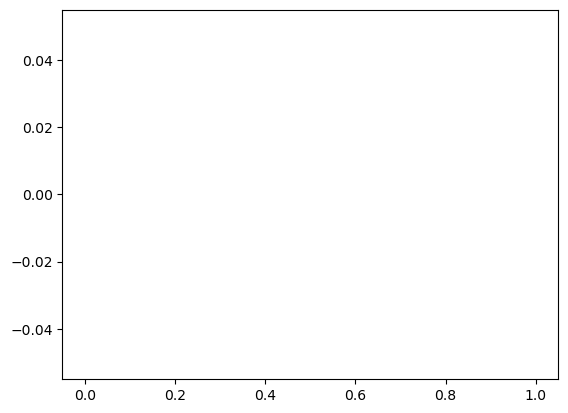

True class: Hyperplastic
(array([0, 0, 0, 0]), array([0.  , 0.25, 0.5 , 0.75, 1.  ]))


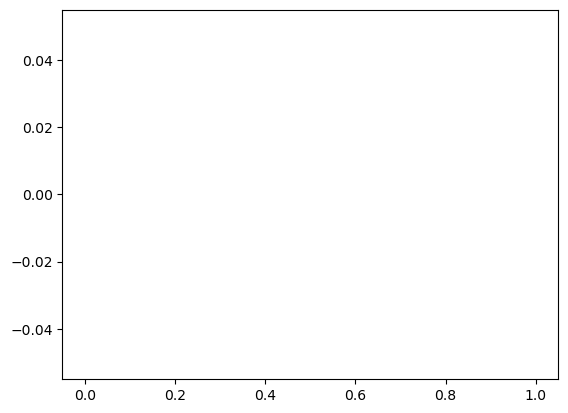

True class: Cancer
(array([846,  31,  88,  35]), array([0.  , 0.75, 1.5 , 2.25, 3.  ]))


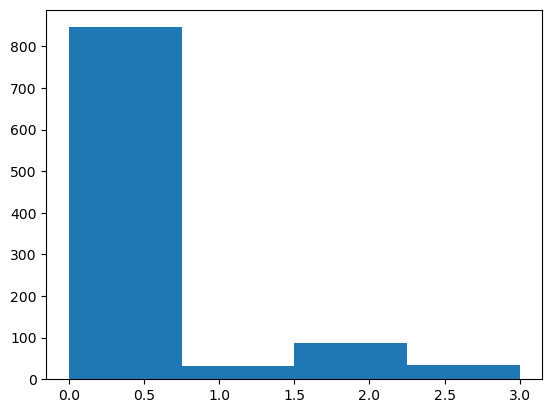

Context: 0
(array([  0,   0, 846,   0]), array([2.5 , 2.75, 3.  , 3.25, 3.5 ]))


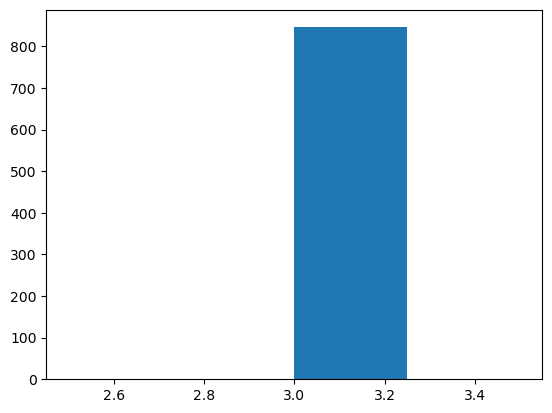

Context: 1
(array([ 0,  0, 31,  0]), array([2.5 , 2.75, 3.  , 3.25, 3.5 ]))


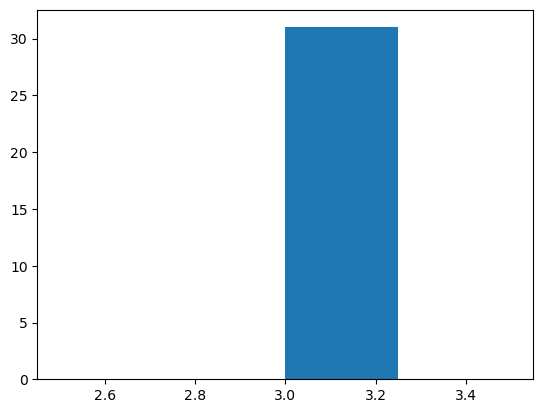

Context: 2
(array([ 0,  0, 88,  0]), array([2.5 , 2.75, 3.  , 3.25, 3.5 ]))


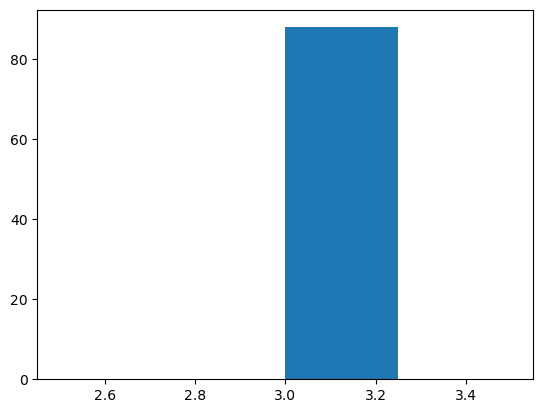

Context: 3
(array([ 0,  0, 35,  0]), array([2.5 , 2.75, 3.  , 3.25, 3.5 ]))


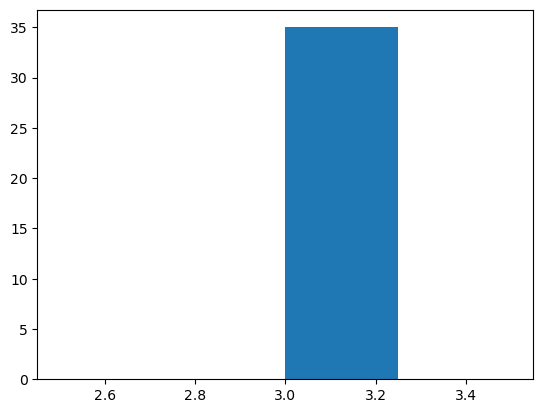

In [51]:
from crime.CRIME_functions import similarity_match
separated_arrays, separated_spectra, spectra_means, crime_labels, figs, second_figs, top_cluster_indices_global = results
# print(len(separated_arrays[2]))
# print(len(separated_spectra[2][0]))
# top_cluster_flat = []
# for sub_array in top_cluster_indices_global:
#     sub_array_flat = []
#     for sub_sub_array in sub_array:
#         sub_array_flat = np.concatenate((sub_array_flat, sub_sub_array), axis=0)
#     top_cluster_flat.append(sub_array_flat)

# print(len(top_cluster_indices_global[0]   ))
# print((top_cluster_flat[3]))
# print((category_indicator))
# print((crime_labels))
cat_names = ['Normal', 'Adenoma', 'Hyperplastic', 'Cancer']
separated_category_indices = [np.where(category_indicator == i) for i in range(4)]
print(crime_labels)
# separated_context_indices = [np.where()]
# print(separated_category_indices[3])
# print(category_indicator)
# print(crime_labels[separated_category_indices[0]])
for true_index in range(max(category_indicator)+1):
    print(f"True class: {cat_names[true_index]}")
    corresponding_crime_labels = crime_labels[separated_category_indices[true_index]]
    print(np.histogram(corresponding_crime_labels, bins=len(separated_arrays)))
    plt.hist(corresponding_crime_labels, bins=len(separated_arrays))
    plt.show()
    cos_similarity = np.dot(corresponding_crime_labels, category_indicator[separated_category_indices[true_index]]) / (np.linalg.norm(corresponding_crime_labels) * np.linalg.norm(category_indicator[separated_category_indices[true_index]]))
    # print(f"Cosine similarity: {cos_similarity}")
# print(separated_category_indices[3])

for context_index in range(len(separated_arrays)):
    print(f"Context: {context_index}")
    context_indices = np.where(crime_labels == context_index)
    context_true_labels = category_indicator[context_indices]
    print(np.histogram(context_true_labels, bins=len(cat_names)))
    plt.hist(context_true_labels, bins=len(cat_names))
    plt.show()
    # print(context_indices)
    # corresponding_true_labels = category_indicator[]

# similarity_match(lime_data_array, encoder, ['Normal', 'Adenoma', 'Hyperplastic', 'Cancer'], separated_arrays, [0,1,2,3], spectra_means)

# Save A Copy of This Notebook

In [58]:
# Labels
import wandb
from IPython.display import Javascript, display
display(Javascript("IPython.notebook.save_checkpoint();"))

workbook_title = f"CRIME_{dataset_config}_{eval_on}_{num_to_use_per_class}_{threshold}_{assume_model_classifications}"
config = {
    "dataset_config": dataset_config,
    "eval_on": eval_on,
    "num_to_use_per_class": num_to_use_per_class,
    "threshold": threshold,
    "assume_model_classifications": assume_model_classifications,
    "model_class": model_class,
    "num_training_folds": num_training_folds,
    "num_val_test_folds": num_val_test_folds,
    "prop_to_use": prop_to_use,
    "sweep_id": sweep_id,
    "vae_config": {
        "input_dim": input_dim,
        "hidden_dim": hidden_dim,
        "latent_dim": latent_dim,
        "output_dim": output_dim,
        "learning_rate": learning_rate,
        "num_epochs": num_epochs,
        "beta": beta
    },
    "num_contexts": len(context_names),
    "use_lime_weights_only": use_lime_weights_only,
}
# Using wandb to log the results
wandb.init(project="TROPHY", entity=entity, name=workbook_title, config=config, tags=["CRIME", "VAE"])
# Logging a copy of this workbook
wandb.save(os.path.join(os.getcwd(), "/local/scratch/code/TROPHY/colon_data_analysis/CRIME/Develop/11_Using_Crime.ipynb"))
# Logging losses
wandb.log({"final_vae_loss": loss[0].item()})
wandb.log({"final_vae_mse_loss": loss[1].item()})
wandb.log({"final_vae_kl_loss": loss[2].item()})
wandb.finish()

<IPython.core.display.Javascript object>

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: tjh200 (tjh200-university-of-cambridge) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: WARNING Saving files without folders. If you want to preserve subdirectories pass base_path to wandb.save, i.e. wandb.save("/mnt/folder/file.h5", base_path="/mnt")


final_vae_kl_loss,▁
final_vae_loss,▁
final_vae_mse_loss,▁
final_vae_kl_loss,0
final_vae_loss,0.1313
final_vae_mse_loss,0.1313


[-9.29393615e-03 -8.58274837e-03 -7.82109284e-03 -7.01345411e-03
 -6.16431669e-03 -5.27816510e-03 -4.35948389e-03 -3.41275756e-03
 -2.44247065e-03 -1.45310768e-03 -4.49153174e-04  5.64908337e-04
  1.58459233e-03  2.74311362e-03  3.86703106e-03  4.85974264e-03
  5.73748806e-03  6.49841768e-03  7.18923365e-03  7.87790067e-03
  8.56836922e-03  9.23752462e-03  9.87988708e-03  1.04847667e-02
  1.10940524e-02  1.17645176e-02  1.24856463e-02  1.32449445e-02
  1.40063708e-02  1.47421248e-02  1.54558811e-02  1.61576858e-02
  1.68612442e-02  1.75834737e-02  1.82960525e-02  1.89978470e-02
  1.95450784e-02  1.99106875e-02  2.00843181e-02  2.00592134e-02
  2.00244169e-02  1.99876539e-02  2.00195965e-02  2.01203053e-02
  2.02601520e-02  2.04386115e-02  2.06389870e-02  2.08657855e-02
  2.11048539e-02  2.13624054e-02  2.16267644e-02  2.18924607e-02
  2.21471716e-02  2.23690235e-02  2.25391120e-02  2.26429397e-02
  2.26758063e-02  2.26341998e-02  2.25228367e-02  2.23711500e-02
  2.21916849e-02  2.20642

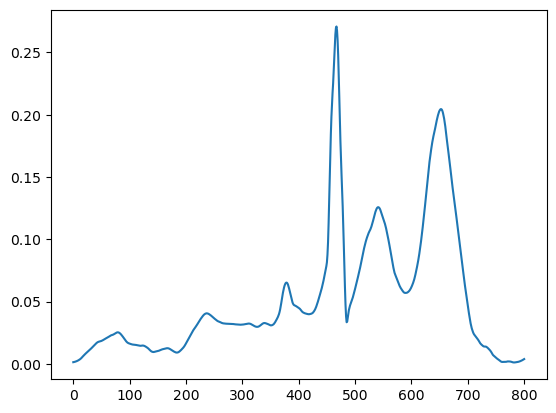

In [37]:
plt.plot(mean_spectra_list[0], label='Mean spectra')
full_raw_data = np.load('/local/scratch/Data/TROPHY/numpy/data.npy').T
# spectra_index_0_location = np.where(full_raw_data == mean_spectra_list[0])
print(full_raw_data[0])
print(mean_spectra_list[0])
print(np.max(mean_spectra_list))
print(spectra_index_0_location)